## Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

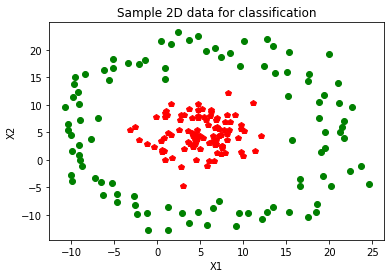

In [2]:
m = 100
mu1 = np.array([5,5])
sigma = np.array([[8,0],[0,8]])

X1 = np.random.multivariate_normal(mu1, sigma, 100)

phi = np.linspace(0,2*np.pi,m).reshape(-1,1)
R = 15 + np.random.normal(1, 2, m).reshape(-1,1)
X2 = np.concatenate((R*np.cos(phi)+mu1[0], R*np.sin(phi)+mu1[1]),1)

plt.plot(X1[:,0], X1[:,1], 'rp', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
print(X1.shape)
print(X2.shape)

(100, 2)
(100, 2)


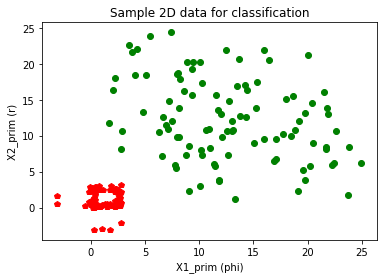

In [4]:
# Polar transform
X1_prim = np.arctan2(X1,X2)
X2_prim = np.sqrt(X1**2 + X2**2)

plt.plot(X1_prim[:,0], X1_prim[:,1], 'rp', label='Class 0')
plt.plot(X2_prim[:,0], X2_prim[:,1], 'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1_prim (phi)')
plt.ylabel('X2_prim (r)')
plt.show()

In [5]:
X = np.concatenate((np.ones((200, 1)), np.concatenate((X1_prim,X2_prim))), 1)
y = np.concatenate((np.zeros((100, 1)), np.ones((100, 1))), 0)

In [6]:
theta = np.zeros((3,1))
alpha = 0.0001

def sigmoid(z):
    return 1.0 / (1 + np.exp(z))

def crossentropy(theta, X, y, alpha):
    yhat = sigmoid(- X @ theta)
    cost = - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

for epoch in range(10000):
    cost, grad_cost = crossentropy(theta, X, y, alpha)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, cost))
    theta = theta - alpha * grad_cost

Epoch 0: cost 0.693147
Epoch 1000: cost 0.101597
Epoch 2000: cost 0.057518
Epoch 3000: cost 0.040895
Epoch 4000: cost 0.032088
Epoch 5000: cost 0.026591
Epoch 6000: cost 0.022813
Epoch 7000: cost 0.020045
Epoch 8000: cost 0.017923
Epoch 9000: cost 0.016241


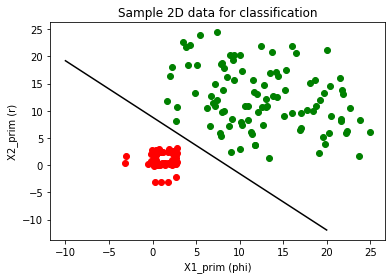

In [7]:
x11 = -10
x12 = 20
x21 = (-theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (-theta[1,0] * x12 - theta[0,0]) / theta[2,0]

plt.plot(X1_prim[:,0], X1_prim[:,1], 'ro', label='Class 0')
plt.plot(X2_prim[:,0], X2_prim[:,1], 'go', label='Class 1')
plt.plot((x11, x12), (x21, x22), 'k-')
plt.title('Sample 2D data for classification')
plt.xlabel('X1_prim (phi)')
plt.ylabel('X2_prim (r)')
plt.show()

In [8]:
def h(X, theta):
    yhat = sigmoid(- X @ theta)
    preds = np.where(yhat >= 0.5, 1, 0)
    return preds

preds = h(X, theta)
accuracy = (preds == y).sum() / y.shape[0]
print('Training set accuracy = %f' % accuracy)

Training set accuracy = 1.000000


In [9]:
theta

array([[-5.69586465],
       [ 0.6684216 ],
       [ 0.64532311]])

In [10]:
# Back to original
#phi = np.linspace(0,2*np.pi,200)
phi = np.arange(-15,15,0.15)
r = (-theta[1,0] * phi - theta[0,0])/theta[2,0]
x1_plot = r * np.sin(phi)
x2_plot = r * np.cos(phi)

In [27]:
X,Y = np.meshgrid(x1_plot,x2_plot)
Z = X**2 + Y**2 - 101

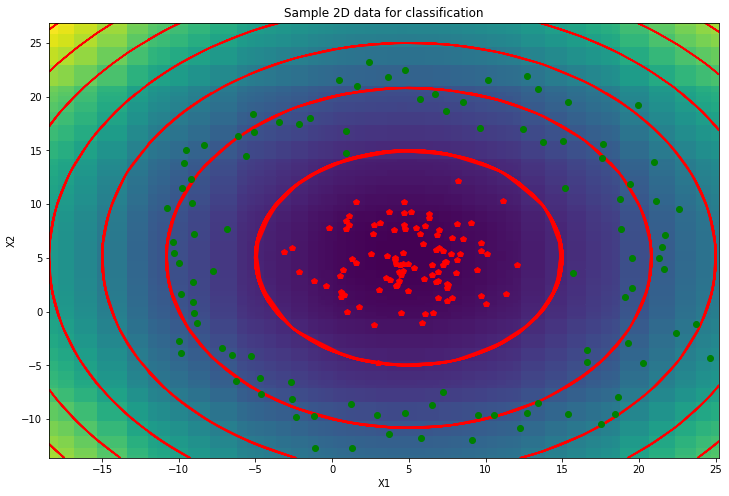

In [28]:
plt.figure(figsize=(12, 8))
plt.contour(X + mu1[0],Y + mu1[1],Z, colors='r')
plt.pcolormesh(X + mu1[0], Y + mu1[1], Z)
plt.plot(X1[:,0], X1[:,1], 'rp', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()